In [89]:
from os import getcwd, remove
from numpy import random
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [90]:
random.seed(111)

In [91]:
def create_dataset(number=1):
    output = []
    
    for i in range(number):
        mondays = pd.date_range(start='1/1/2009', end='12/31/2012', freq='W-MON')
        
        rand_data = random.randint(low=25, high=1000, size=len(mondays))
        
        status = [1, 2, 3]
        
        rand_status = [status[random.randint(low=0, high=len(status))] for i in range(len(mondays))]
        
        states = ['GA', 'FL', 'fl', 'NY', 'NJ', 'TX']
        
        rand_states = [states[random.randint(low=0, high=len(states))] for i in range(len(mondays))]
        
        output.extend(zip(rand_states, rand_status, rand_data, mondays))
    return output

In [92]:
dataset = create_dataset()
df = pd.DataFrame(data=dataset, columns=['State', 'Status', 'CustomerCount', 'StatusDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 4 columns):
State            209 non-null object
Status           209 non-null int64
CustomerCount    209 non-null int64
StatusDate       209 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 6.6+ KB


In [93]:
df.head()

,State,Status,CustomerCount,StatusDate
0,GA,1,877,2009-01-05
1,FL,1,901,2009-01-12
2,fl,3,749,2009-01-19
3,FL,3,111,2009-01-26
4,GA,1,300,2009-02-02


In [94]:
# save as Excel file
df.to_excel('lesson3.xls', index=False)

In [95]:
!ls

lesson1.ipynb  lesson2.ipynb  lesson3.ipynb  lesson3.xls


In [96]:
# read Excel file
df = pd.read_excel(getcwd() + '/lesson3.xls', 0, index_col='StatusDate')
df.dtypes

State            object
Status            int64
CustomerCount     int64
dtype: object

In [97]:
df.index

DatetimeIndex(['2009-01-05', '2009-01-12', '2009-01-19', '2009-01-26',
               '2009-02-02', '2009-02-09', '2009-02-16', '2009-02-23',
               '2009-03-02', '2009-03-09',
               ...
               '2012-10-29', '2012-11-05', '2012-11-12', '2012-11-19',
               '2012-11-26', '2012-12-03', '2012-12-10', '2012-12-17',
               '2012-12-24', '2012-12-31'],
              dtype='datetime64[ns]', name='StatusDate', length=209, freq=None)

In [98]:
df.head()

,State,Status,CustomerCount
StatusDate,,,
2009-01-05,GA,1,877
2009-01-12,FL,1,901
2009-01-19,fl,3,749
2009-01-26,FL,3,111
2009-02-02,GA,1,300


In [99]:
df['State'].unique()

array(['GA', 'FL', 'fl', 'TX', 'NY', 'NJ'], dtype=object)

In [100]:
mask = df['Status'] == 1
df = df[mask]

In [101]:
mask = df.State == 'NJ'
df.loc[mask, 'State'] = 'NY'
df['State'].unique()

array(['GA', 'FL', 'NY', 'fl', 'TX'], dtype=object)

In [102]:
df['State'] = df.State.apply(lambda x: x.upper())
df['State'].unique()

array(['GA', 'FL', 'NY', 'TX'], dtype=object)

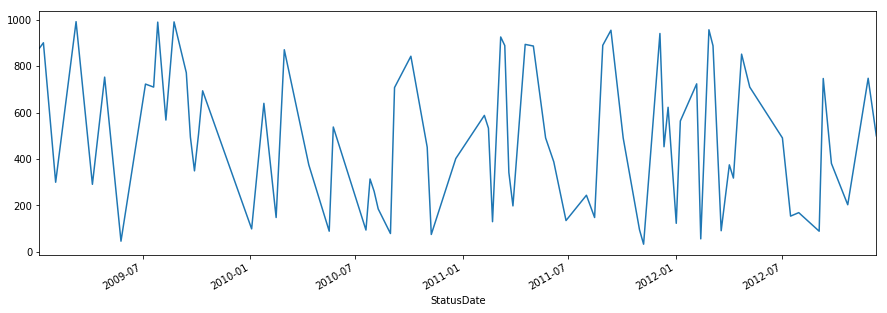

In [103]:
# plot to check for outliers
df['CustomerCount'].plot(figsize=(15, 5))

In [104]:
sorted_f = df[df['State'] == 'NY'].sort_index(axis=0)
sorted_f.head(10)

,State,Status,CustomerCount
StatusDate,,,
2009-03-09,NY,1,992
2009-04-27,NY,1,753
2009-07-27,NY,1,990
2009-09-14,NY,1,772
2009-09-28,NY,1,349
2009-10-12,NY,1,694
2010-01-25,NY,1,640
2010-04-12,NY,1,375
2010-05-24,NY,1,538


In [105]:
daily = df.reset_index().groupby(['State', 'StatusDate']).sum()
daily.head()

Status  CustomerCount
State StatusDate                       
FL    2009-01-12       1            901
      2009-04-06       1            291
      2009-07-06       1            723
      2009-07-20       1            710
      2009-08-24       1            991

In [106]:
del daily['Status']
daily.head()

CustomerCount
State StatusDate               
FL    2009-01-12            901
      2009-04-06            291
      2009-07-06            723
      2009-07-20            710
      2009-08-24            991

In [107]:
daily.index

MultiIndex(levels=[['FL', 'GA', 'NY', 'TX'], [2009-01-05 00:00:00, 2009-01-12 00:00:00, 2009-02-02 00:00:00, 2009-03-09 00:00:00, 2009-04-06 00:00:00, 2009-04-27 00:00:00, 2009-05-25 00:00:00, 2009-07-06 00:00:00, 2009-07-20 00:00:00, 2009-07-27 00:00:00, 2009-08-10 00:00:00, 2009-08-24 00:00:00, 2009-09-14 00:00:00, 2009-09-21 00:00:00, 2009-09-28 00:00:00, 2009-10-05 00:00:00, 2009-10-12 00:00:00, 2010-01-04 00:00:00, 2010-01-25 00:00:00, 2010-02-15 00:00:00, 2010-03-01 00:00:00, 2010-04-12 00:00:00, 2010-05-17 00:00:00, 2010-05-24 00:00:00, 2010-07-19 00:00:00, 2010-07-26 00:00:00, 2010-08-02 00:00:00, 2010-08-09 00:00:00, 2010-08-30 00:00:00, 2010-09-06 00:00:00, 2010-10-04 00:00:00, 2010-11-01 00:00:00, 2010-11-08 00:00:00, 2010-12-20 00:00:00, 2011-02-07 00:00:00, 2011-02-14 00:00:00, 2011-02-21 00:00:00, 2011-03-07 00:00:00, 2011-03-14 00:00:00, 2011-03-21 00:00:00, 2011-03-28 00:00:00, 2011-04-18 00:00:00, 2011-05-02 00:00:00, 2011-05-23 00:00:00, 2011-06-06 00:00:00, 2011-06-2

In [108]:
daily.index.levels[1]

DatetimeIndex(['2009-01-05', '2009-01-12', '2009-02-02', '2009-03-09',
               '2009-04-06', '2009-04-27', '2009-05-25', '2009-07-06',
               '2009-07-20', '2009-07-27', '2009-08-10', '2009-08-24',
               '2009-09-14', '2009-09-21', '2009-09-28', '2009-10-05',
               '2009-10-12', '2010-01-04', '2010-01-25', '2010-02-15',
               '2010-03-01', '2010-04-12', '2010-05-17', '2010-05-24',
               '2010-07-19', '2010-07-26', '2010-08-02', '2010-08-09',
               '2010-08-30', '2010-09-06', '2010-10-04', '2010-11-01',
               '2010-11-08', '2010-12-20', '2011-02-07', '2011-02-14',
               '2011-02-21', '2011-03-07', '2011-03-14', '2011-03-21',
               '2011-03-28', '2011-04-18', '2011-05-02', '2011-05-23',
               '2011-06-06', '2011-06-27', '2011-08-01', '2011-08-15',
               '2011-08-29', '2011-09-12', '2011-10-03', '2011-10-31',
               '2011-11-07', '2011-12-05', '2011-12-12', '2011-12-19',
      

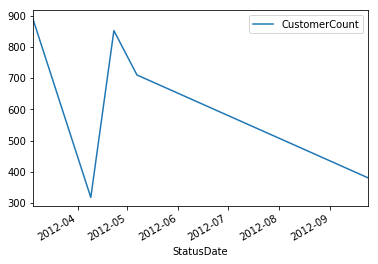

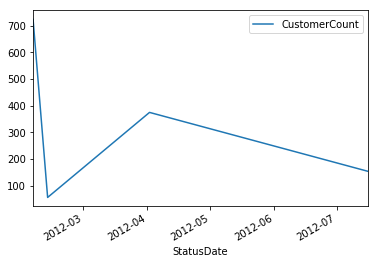

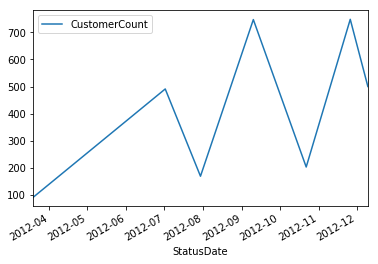

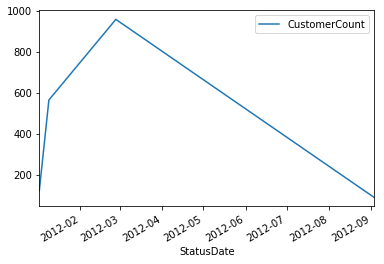

In [109]:
daily.loc['FL']['2012':].plot()
daily.loc['GA']['2012':].plot()
daily.loc['NY']['2012':].plot()
daily.loc['TX']['2012':].plot()

In [110]:
state_year_month = daily.groupby([daily.index.get_level_values(0), daily.index.get_level_values(1).year, daily.index.get_level_values(1).month])
daily['Lower'] = state_year_month['CustomerCount'].transform( lambda x: x.quantile(q=.25) - (1.5*x.quantile(q=.75)-x.quantile(q=.25)) )
daily['Upper'] = state_year_month['CustomerCount'].transform( lambda x: x.quantile(q=.75) + (1.5*x.quantile(q=.75)-x.quantile(q=.25)) )
daily['Outlier'] = (daily['CustomerCount'] < daily['Lower']) | (daily['CustomerCount'] > daily['Upper'])
daily = daily[daily['Outlier'] == False]

In [111]:
all = pd.DataFrame(daily['CustomerCount'].groupby(daily.index.get_level_values(1)).sum())
all.columns = ['CustomerCount']

year_month = all.groupby([lambda x: x.year, lambda x: x.month])

all['Max'] = year_month['CustomerCount'].transform(lambda x: x.max())
all.head()

,CustomerCount,Max
StatusDate,,
2009-01-05,877,901
2009-01-12,901,901
2009-02-02,300,300
2009-03-09,992,992
2009-04-06,291,753


In [112]:
data = [1000, 2000, 3000]
idx = pd.date_range(start='12/31/2011', end='12/31/2013', freq='A')
goals = pd.DataFrame(data, index=idx, columns=['Goals'])
goals

,Goals
2011-12-31,1000
2012-12-31,2000
2013-12-31,3000


In [113]:
combined = pd.concat([all,goals], axis=0)
combined = combined.sort_index(axis=0)
combined.tail()

,CustomerCount,Goals,Max
2012-10-22,203.0,NaN,203.0
2012-11-26,748.0,NaN,748.0
2012-12-10,500.0,NaN,500.0
2012-12-31,NaN,2000.0,NaN
2013-12-31,NaN,3000.0,NaN


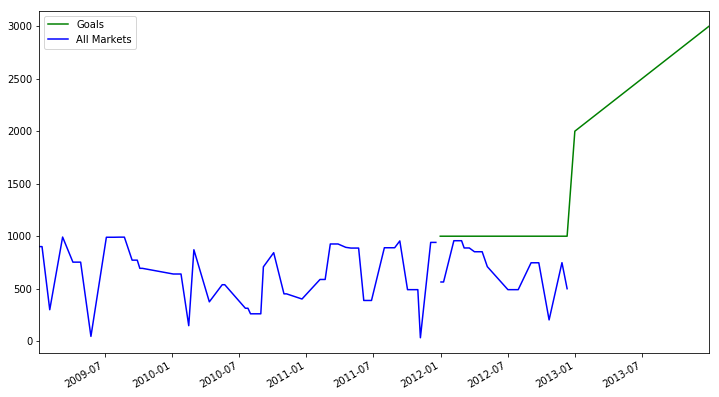

In [115]:
fig, axes = plt.subplots(figsize=(12, 7))

combined['Goals'].fillna(method='pad').plot(color='green', label='Goals')
combined['Max'].plot(color='blue', label='All Markets')
plt.legend(loc='best')

In [116]:
year = combined.groupby(lambda x: x.year).max()
year

,CustomerCount,Goals,Max
2009,992.0,NaN,992.0
2010,871.0,NaN,871.0
2011,955.0,1000.0,955.0
2012,957.0,2000.0,957.0
2013,NaN,3000.0,NaN


In [117]:
year['YR_PCT_Change'] = year['Max'].pct_change(periods=1)
year

,CustomerCount,Goals,Max,YR_PCT_Change
2009,992.0,NaN,992.0,NaN
2010,871.0,NaN,871.0,-0.121976
2011,955.0,1000.0,955.0,0.096441
2012,957.0,2000.0,957.0,0.002094
2013,NaN,3000.0,NaN,NaN


In [119]:
(1 + year.loc[2012,'YR_PCT_Change']) * year.loc[2012,'Max']

959.00418848167533

Text(0.5,1,'North East')

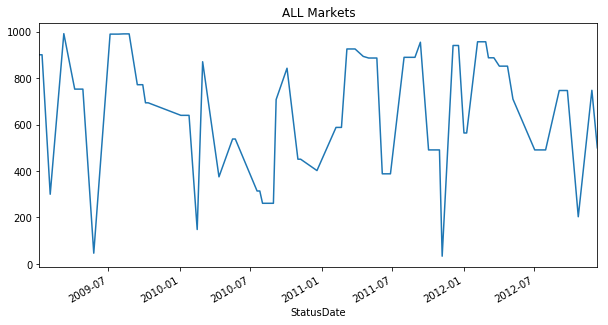

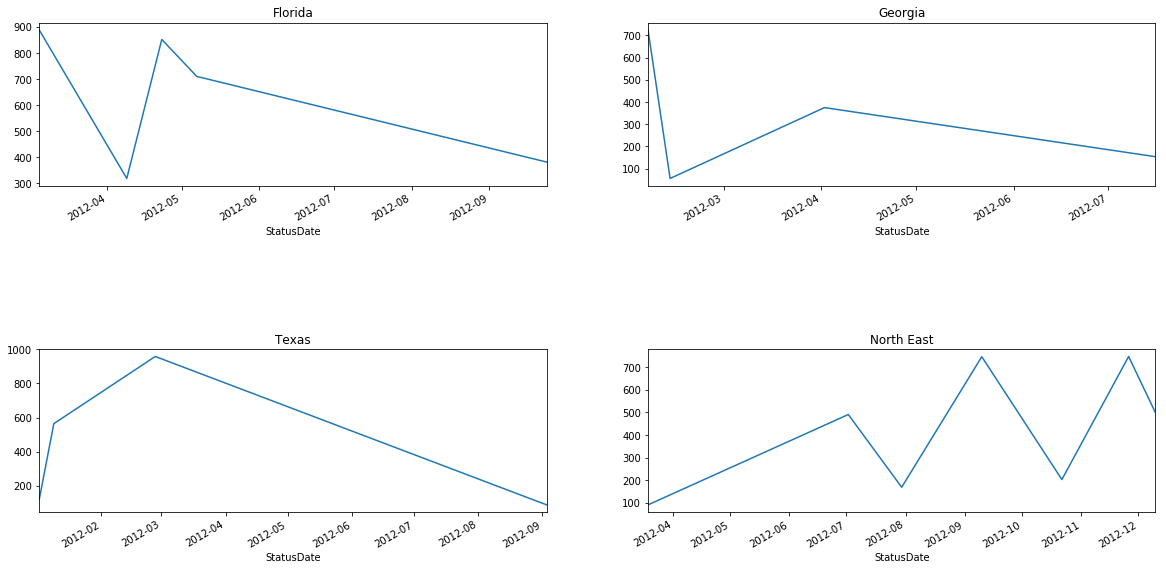

In [120]:
all['Max'].plot(figsize=(10, 5))
plt.title('ALL Markets')

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
fig.subplots_adjust(hspace=1.0)

daily.loc['FL']['CustomerCount']['2012':].fillna(method='pad').plot(ax=axes[0,0])
daily.loc['GA']['CustomerCount']['2012':].fillna(method='pad').plot(ax=axes[0,1]) 
daily.loc['TX']['CustomerCount']['2012':].fillna(method='pad').plot(ax=axes[1,0]) 
daily.loc['NY']['CustomerCount']['2012':].fillna(method='pad').plot(ax=axes[1,1]) 

axes[0,0].set_title('Florida')
axes[0,1].set_title('Georgia')
axes[1,0].set_title('Texas')
axes[1,1].set_title('North East')